# 2026-01-12 Finite Differences

## Last time
* General shape of PDE solvers and stakeholders
* Comparing/plotting cost and accuracy
* Learning strategy

## Today
* Discussion and scoping
* Evaluating derivatives
* Taylor series and truncation error
* Stability
* Measuring convergence

## Examples of PDE

* Navier-Stokes (viscous fluids)
  * nonlinear
  * incompressible or compressible
* Elasticity
  * linear elasticity
  * hyperelasticity (geometric nonlinear + material nonlinearity)
  * time dependent (dynamics) or steady state
* Hamilton-Jacobi-Bellman
  * optimal control
* Wave equations
  * acoustics
  * elasticity
  * electromagnetics
  * frequency domain

# Choices in scoping the class

## Theory

Analysis first, confirm using numerics.
Limited to simpler models.

## Applied
Numerics first, pointers to useful theory.

---

## Build from scratch

Limited to simpler models, but you'll understand everything under the hood.

## Build using libraries

More installation and software layers, but can solve more interesting problems.

# Consider the boundary value problem: find $u$:

\begin{gather} -\frac{d^2 u}{dx^2} = f(x) \quad x \in \Omega = (-1,1) \\
u(-1) = a \quad \frac{du}{dx}(1) = b .
\end{gather}

We say
* $f(x)$ is the "forcing"
* the left boundary condition is Dirichlet
* the right boundary condition is Neumann

We need to choose
* how to represent $u(x)$, including evaluating it on the boundary,
* how to compute derivatives of $u$,
* in what sense to ask for the differential equation to be satisfied,
* where to evaluate $f(x)$ or integrals thereof,
* how to enforce boundary conditions.

# Finite Difference/collocation approach to solve $u$:

\begin{gather} -\frac{d^2 u}{dx^2} = f(x) \quad x \in \Omega = (-1,1) \\
u(-1) = a \quad \frac{du}{dx}(1) = b .
\end{gather}

* Represent the function $u(x)$ by its values $u_i = u(x_i)$ at a discrete set of points $$ -1 = x_1 < x_2 < \dotsb < x_n = 1 . $$
  * The FD framework does not uniquely specify the solution values at other points
* Compute derivatives at $x_i$ via differencing formulas involving a finite number of neighbor points (independent of the total number of points $n$).
* FD methods ask for the differential equation to be satisfied pointwise at each $x_i$ in the interior of the domain.
* Evaluate the forcing term $f$ pointwise at $x_i$.
* Approximate derivatives at discrete boundary points ($x_n = 1$ above), typically using one-sided differencing formulas.

# Computing a derivative

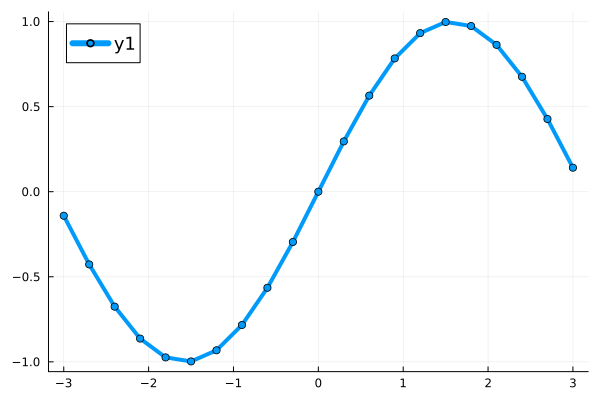

In [36]:
using Plots
default(linewidth=4, legendfontsize=12)

n = 21
h = 6 / (n - 1)
x = LinRange(-3, 3, n)
u = sin.(x)
plot(x, u, marker=:circle)

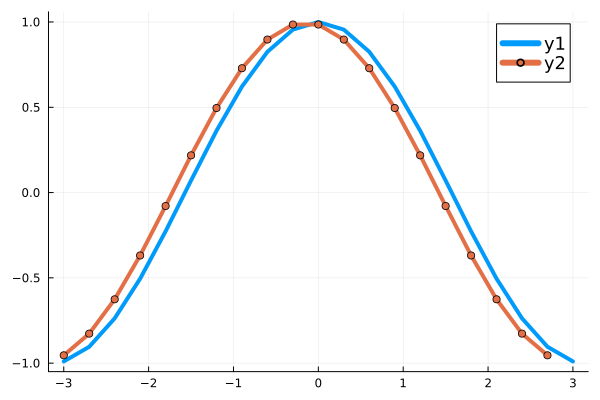

In [37]:
u_x = cos.(x)
fd_u_x = (u[2:end] - u[1:end-1]) / h

plot(x, u_x)
plot!(x[1:end-1], fd_u_x, marker=:circle)

# How accurate is it?

Without loss of generality, we'll approximate $u'(x_i = 0)$, taking $h = x_{i+1} - x_i$.

$$ u(x) = u(0) + u'(0)x + u''(0)x^2/2! + O(x^3)$$
and substitute into the differencing formula
$$ \begin{split} u'(0) \approx \frac{u(h) - u(0)}{h} = h^{-1} \Big( u(0) + u'(0) h + u''(0)h^2/2 + O(h^3) - u(0) \Big) \\
= u'(0) + u''(0)h/2 + O(h^2) . \end{split}$$
Evidently the error in this approximation is $u''(0)h/2 + O(h^2)$. We say this method is *first order accurate*.

# A note on stable computation

In [54]:
x = 1e-15 # big"1e-15"
@show x
@show big(1+Float64(x))
@show log(1 + x)

x = 1.0e-15
big(1 + Float64(x)) = 1.0000000000000011102230246251565404236316680908203125
log(1 + x) = 1.110223024625156e-15


1.110223024625156e-15

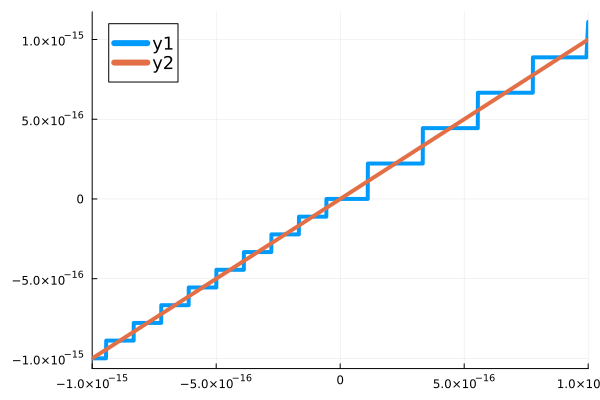

In [56]:
plot([h -> log(1+h), log1p], xlim=(-1e-15, 1e-15))

What happens as we zoom in?

# A few methods on grids

In [66]:
diff1l(x, u) = x[2:end],   (u[2:end] - u[1:end-1]) ./ (x[2:end] - x[1:end-1])
diff1r(x, u) = x[1:end-1], (u[2:end] - u[1:end-1]) ./ (x[2:end] - x[1:end-1])
diff1c(x, u) = x[2:end-1], (u[3:end] - u[1:end-2]) ./ (x[3:end] - x[1:end-2])
difflist = [diff1l, diff1r, diff1c]

n = 21
h = 6 / (n - 1)
x = LinRange(-3, 3, n)
u = sin.(x)
fig = plot(cos, xlims=(-3, 3))
for d in difflist
    xx, yy = d(x, u)
    plot!(fig, xx, yy, marker=:circle, label=d)
end

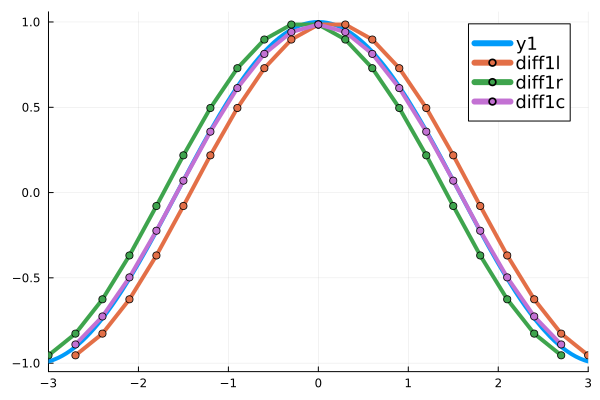

In [67]:
fig

# Measuring error on grids

In [76]:
using LinearAlgebra

grids = 2 .^ (2:10)
hs = 1 ./ grids
function refinement_error(f, fprime, d)
    error = []
    for n in grids
        x = LinRange(-3, 3, n)
        xx, yy = d(x, f.(x))
        push!(error, norm(yy - fprime.(xx), 2)/sqrt(n))
    end
    error
end

refinement_error (generic function with 1 method)

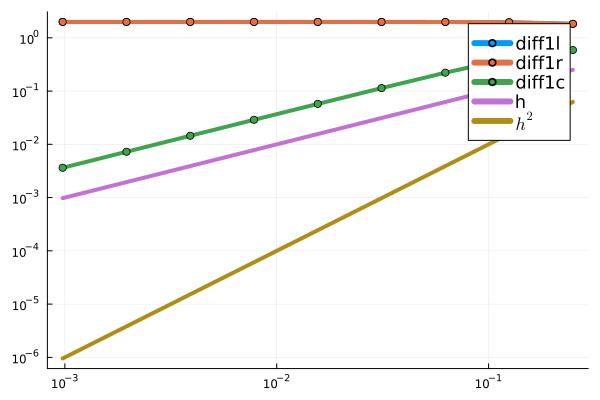

In [77]:
fig = plot(xscale=:log10, yscale=:log10)
for d in difflist
    error = refinement_error(sin, cos, d)
    plot!(fig, hs, error, marker=:circle, label=d)
end
plot!(fig, hs, [hs hs .^ 2], label=["h" "\$h^2\$"])

What happens if we use a 1-norm or 2-norm?

# Activity on stability and accuracy computing derivatives

* Accept the activity on Canvas
* Clone the repo
  * If you're using coding.csel.io
    * use `gh auth login` from the terminal (you'll only need to do this once)
    * then use the Git sidebar widget to clone
  * `git clone https://github.com/cu-numpde/2026-01-14-derivatives-YOUR-GH-USERNAME` (or with `ssh`)
* Complete the activity, commit your changes, and push.